In [18]:
from sklearn.datasets import make_regression
import numpy as np
import pandas as pd
# %matplotlib notebook
from matplotlib import pyplot as plt
import scipy.stats
from numpy import sqrt
%matplotlib inline
# Visualitzarem només 3 decimals per mostra
pd.set_option('display.float_format', lambda x: '%.3f' % x)

# Funcio per a llegir dades en format csv
def load_dataset(path):
    dataset = pd.read_csv(path, header=0, delimiter=',')
    return dataset

In [19]:
data2016 = load_dataset('/Users/carlo/OneDrive/Escritorio/UNI/TERCERO/AP/kaggle/2016_Financial_Data.csv')
data_values = data2016.values
data2016.dataframeName = '2016_Financial_Data.csv'

x = data_values[:, :2]
y = data_values[:, 2]

print("Dimensionalitat de la BBDD:", data2016.shape)
print("Dimensionalitat de les entrades X", x.shape)
print("Dimensionalitat de l'atribut Y", y.shape)

Dimensionalitat de la BBDD: (4797, 225)
Dimensionalitat de les entrades X (4797, 2)
Dimensionalitat de l'atribut Y (4797,)


In [20]:
data2016.head(10)

,Unnamed: 0,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,...,Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Sector,2017 PRICE VAR [%],Class
0,PG,65299000000.000,-0.077,32909000000.000,32390000000.000,0.000,18949000000.000,18949000000.000,13441000000.000,579000000.000,...,-0.043,-0.053,-0.018,-0.063,0.008,0.000,-0.081,Consumer Defensive,12.532,1
1,VIPS,8148495608.351,0.316,6190739812.815,1957755795.536,225137796.976,688095896.328,1567876889.849,389878905.688,12267098.632,...,0.923,0.013,0.171,0.511,-0.014,0.357,0.317,Consumer Defensive,4.363,1
2,KR,109830000000.000,0.013,85496000000.000,24334000000.000,0.000,17946000000.000,20758000000.000,3576000000.000,482000000.000,...,0.370,0.084,0.112,0.280,0.042,0.000,0.046,Consumer Defensive,-17.068,0
3,RAD,20770237000.000,-0.217,15778258000.000,4991979000.000,0.000,4581171000.000,4621042000.000,370937000.000,186132000.000,...,0.632,-0.065,0.285,8.563,0.258,0.000,-0.316,Consumer Defensive,-75.917,0
4,GIS,16563100000.000,-0.060,10733600000.000,5829500000.000,0.000,3118900000.000,3270300000.000,2559200000.000,303800000.000,...,-0.019,-0.083,-0.005,-0.011,-0.083,0.000,-0.063,Consumer Defensive,-1.163,0
5,PM,74953000000.000,0.014,57659000000.000,17294000000.000,0.000,6317000000.000,6391000000.000,10903000000.000,891000000.000,...,0.260,0.064,0.085,0.043,0.021,0.000,-0.051,Consumer Defensive,20.190,1
6,KO,41863000000.000,-0.055,16465000000.000,25398000000.000,0.000,15370000000.000,16741000000.000,8657000000.000,733000000.000,...,-0.022,-0.078,-0.030,-0.090,0.036,0.000,-0.064,Consumer Defensive,13.452,1
7,WMT,482130000000.000,-0.007,360984000000.000,121146000000.000,0.000,97041000000.000,97041000000.000,24105000000.000,2548000000.000,...,-0.170,-0.015,-0.019,-0.003,-0.003,0.000,0.039,Consumer Defensive,47.543,1
8,MDLZ,25923000000.000,-0.125,15819000000.000,10104000000.000,0.000,6546000000.000,7559000000.000,2545000000.000,1115000000.000,...,-0.098,-0.054,-0.021,-0.076,0.117,0.000,-0.136,Consumer Defensive,-2.718,0
9,MO,25744000000.000,0.012,14172000000.000,11572000000.000,0.000,2662000000.000,2811000000.000,8761000000.000,747000000.000,...,0.218,0.010,0.460,3.458,0.081,0.000,-0.017,Consumer Defensive,9.429,1


In [21]:
corr = data2016.corr()
corr

,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,2017 PRICE VAR [%],Class
Revenue,1.000,-0.007,0.985,0.811,0.415,0.557,0.799,0.627,0.660,0.627,...,0.039,-0.008,-0.010,-0.009,0.000,-0.007,-0.010,-0.015,-0.003,0.048
Revenue Growth,-0.007,1.000,-0.006,-0.007,-0.003,-0.006,-0.007,-0.006,-0.007,-0.006,...,-0.000,0.005,0.004,0.002,-0.000,0.095,0.000,0.028,-0.000,0.005
Cost of Revenue,0.985,-0.006,1.000,0.697,0.361,0.435,0.590,0.422,0.625,0.441,...,0.030,-0.006,-0.008,-0.008,-0.002,-0.006,-0.009,-0.013,-0.002,0.036
Gross Profit,0.811,-0.007,0.697,1.000,0.500,0.835,0.954,0.824,0.619,0.794,...,0.046,-0.008,-0.012,-0.009,0.003,-0.007,-0.010,-0.016,-0.005,0.084
R&D Expenses,0.415,-0.003,0.361,0.500,1.000,0.304,0.383,0.396,0.256,0.469,...,0.022,-0.003,-0.005,-0.004,-0.002,0.003,0.000,-0.007,-0.002,0.054
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Debt Growth,-0.007,0.095,-0.006,-0.007,0.003,-0.004,-0.006,-0.007,-0.009,-0.007,...,-0.000,0.005,0.003,0.066,0.058,1.000,0.002,0.002,-0.001,-0.027
R&D Expense Growth,-0.010,0.000,-0.009,-0.010,0.000,-0.009,-0.009,-0.008,-0.010,-0.007,...,0.012,-0.003,-0.001,0.034,0.002,0.002,1.000,0.022,0.011,0.005
SG&A Expenses Growth,-0.015,0.028,-0.013,-0.016,-0.007,-0.013,-0.014,-0.013,-0.015,-0.012,...,0.002,0.001,0.015,0.130,0.002,0.002,0.022,1.000,0.002,-0.035
2017 PRICE VAR [%],-0.003,-0.000,-0.002,-0.005,-0.002,-0.005,-0.005,-0.004,-0.004,-0.004,...,-0.000,-0.001,-0.001,0.002,0.001,-0.001,0.011,0.002,1.000,0.014


### Data Cleaning

C:\Users\carlo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


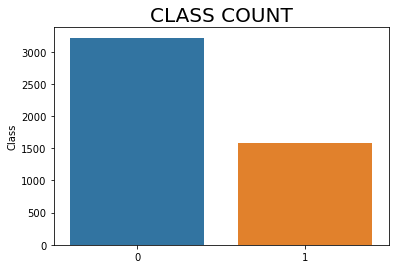

C:\Users\carlo\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


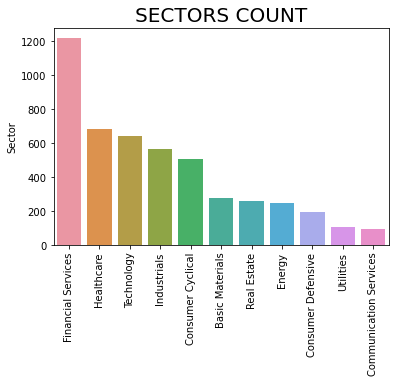

In [22]:
import seaborn as sns## Limpiamos datos
# Plot class distribution
df2016_class = data2016['Class'].value_counts()
sns.barplot(np.arange(len(df2016_class)), df2016_class)
plt.title('CLASS COUNT', fontsize=20)
plt.show()

# Plot sector distribution
df2016_sector = data2016['Sector'].value_counts()
sns.barplot(np.arange(len(df2016_sector)), df2016_sector)
plt.xticks(np.arange(len(df2016_sector)), df2016_sector.index.values.tolist(), rotation=90)
plt.title('SECTORS COUNT', fontsize=20)
plt.show()

In [23]:
df2016_class

1    3218
0    1579
Name: Class, dtype: int64

The plots above show that:

1. the samples are not balanced in terms of class. Indeed, 1579 samples belong to class 0, which as explained in the documentation of the dataset correspond to stocks that are not buy-worthy. At the same time, 3218 samples belong to class 1, meaning they are buy-worthy stocks. This should be accounted for when splitting the data between training and testing data (it is useful to use the stratify option available within sklearn.model_selection.train_test_split).
2. there is a total of 11 sectors, 3 of them with about 500+ stocks each, while the remaining 8 sectors have less than 300 stocks. In particular, the sectors Utilities and Communication Services have around 100 samples. This has to be kept in mind if we want to use this data with ML algorithms: there are very few samples, which could lead to overfitting, etc.

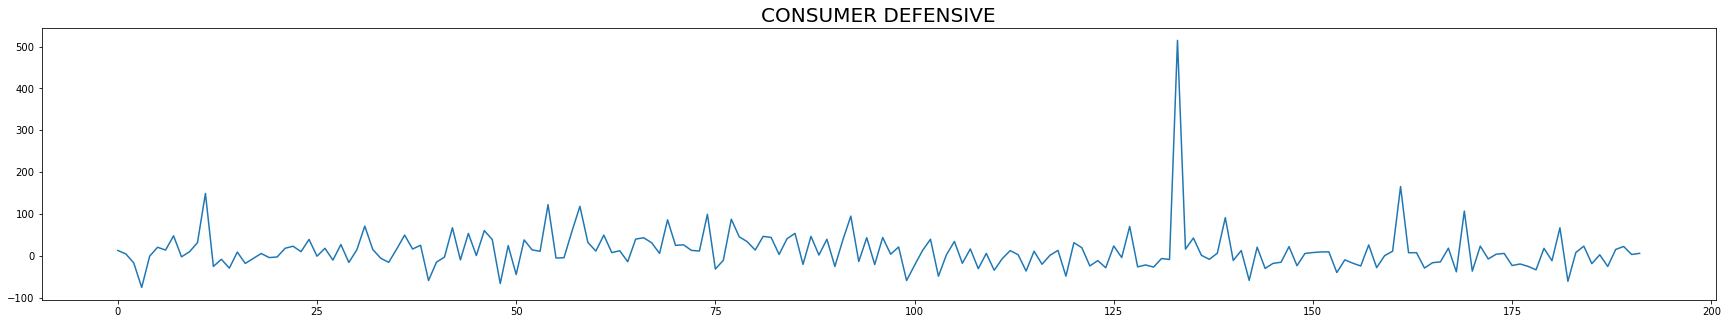

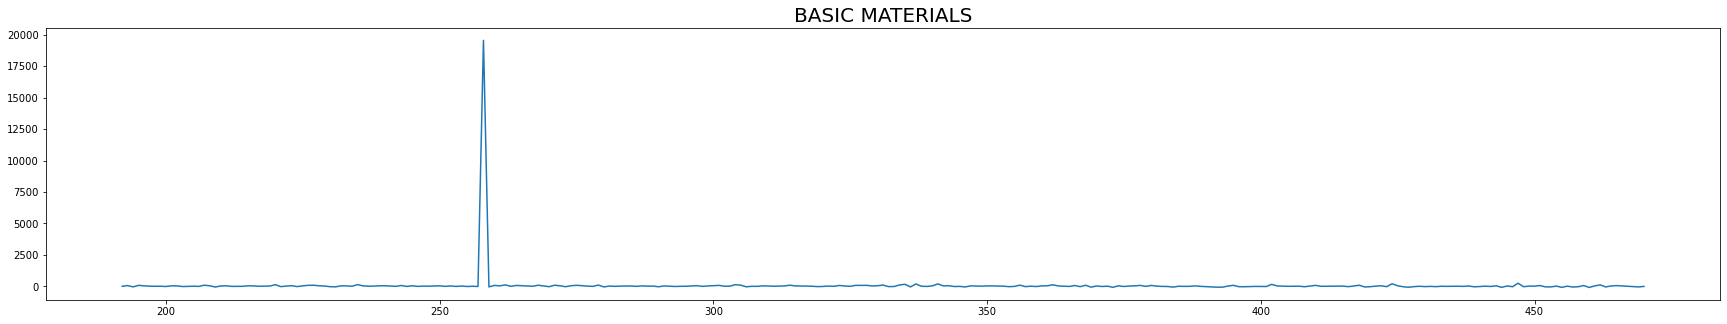

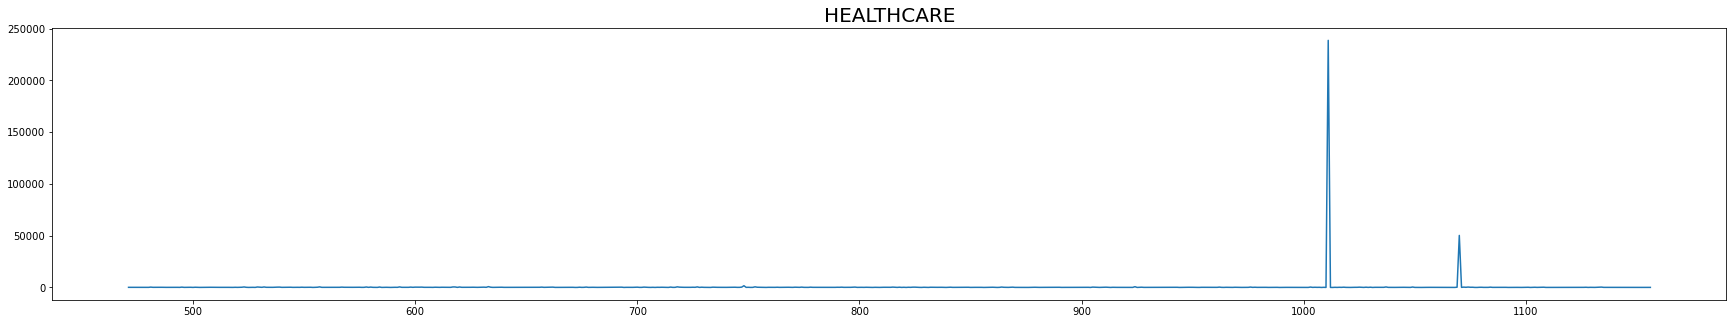

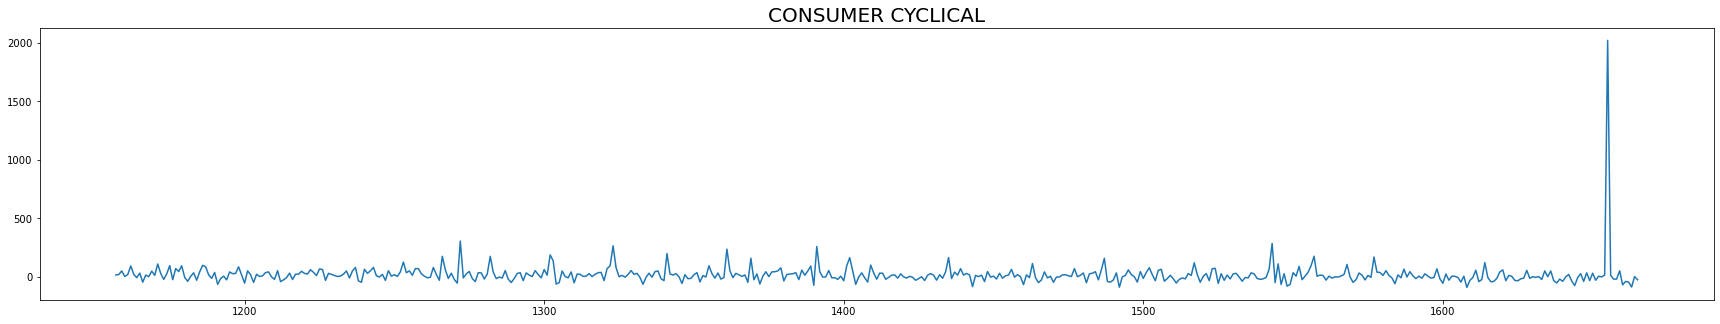

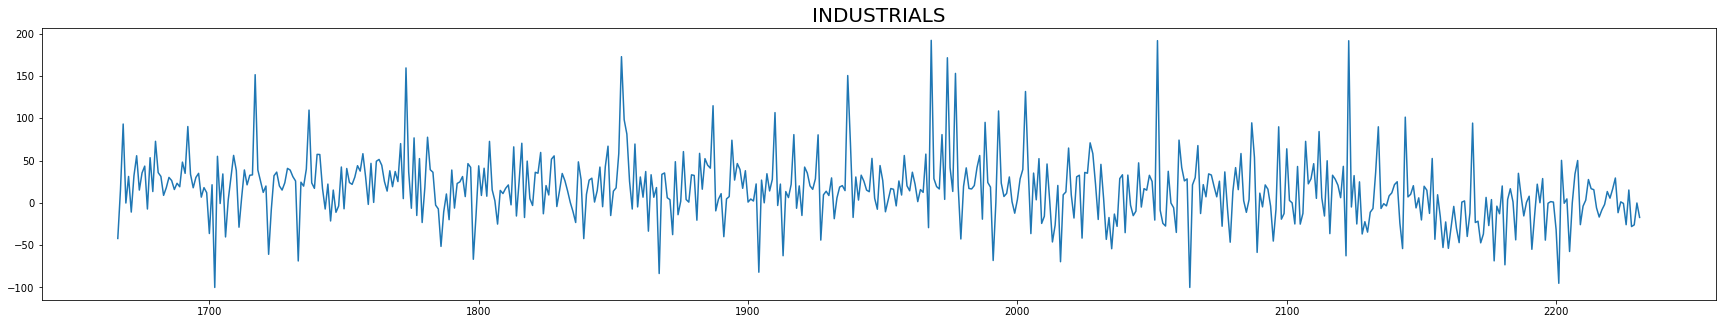

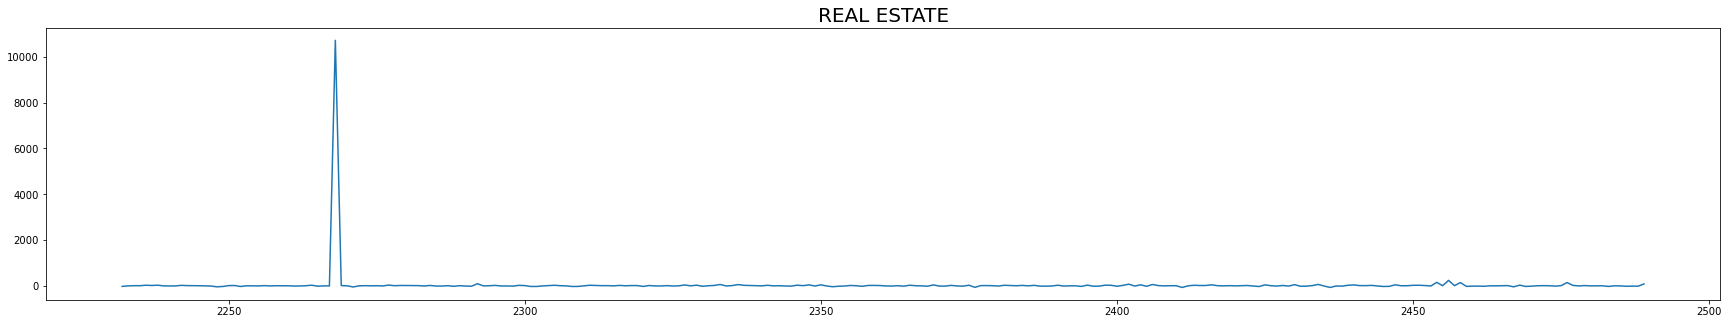

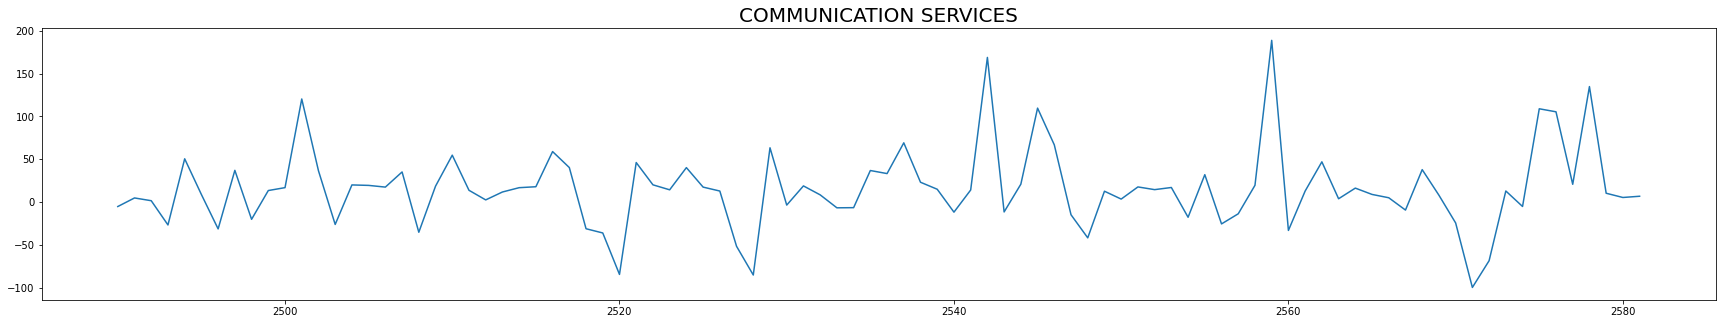

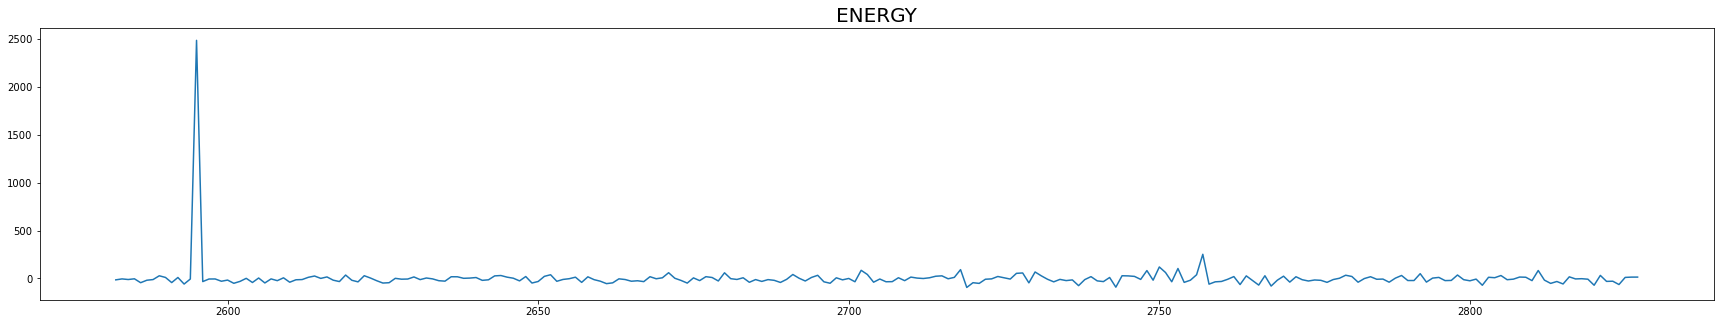

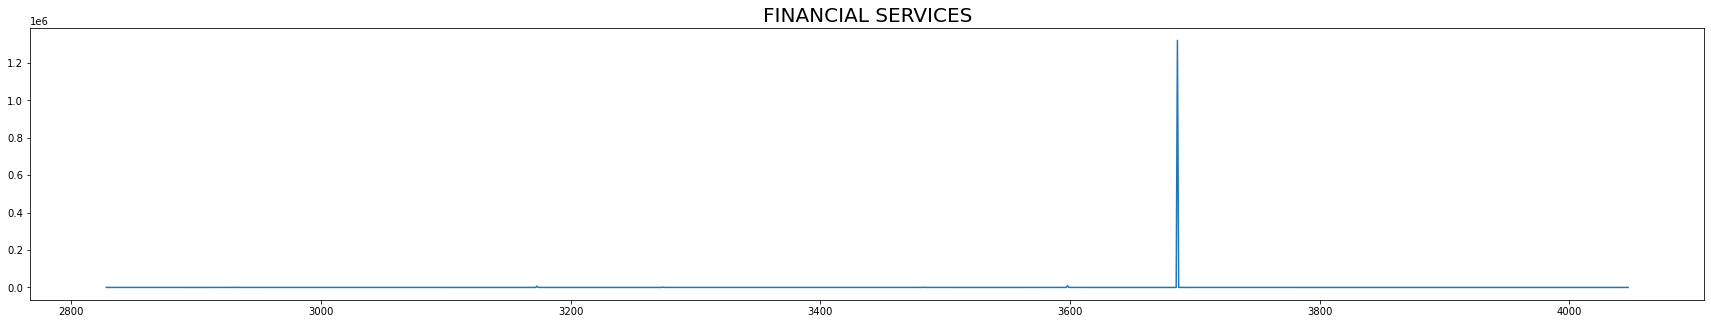

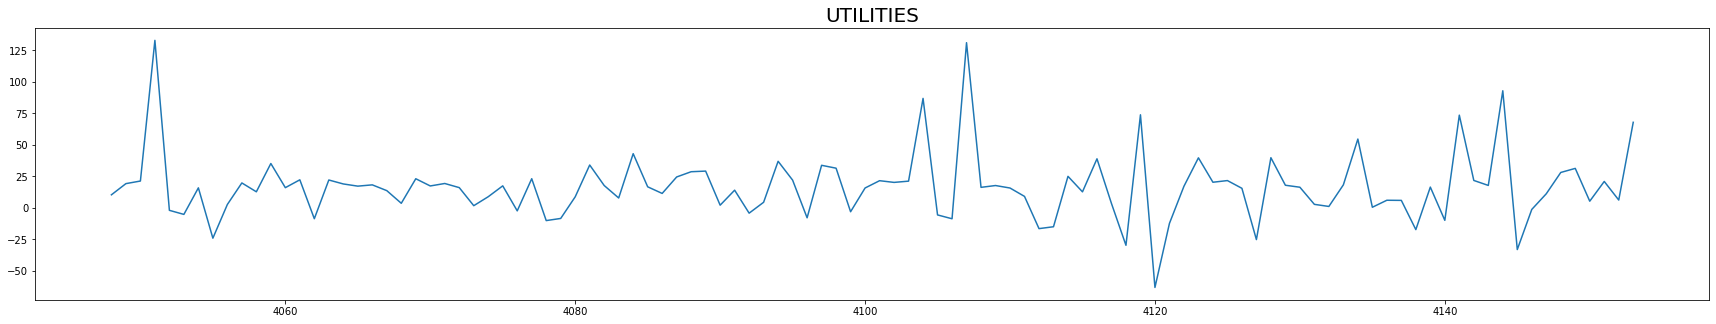

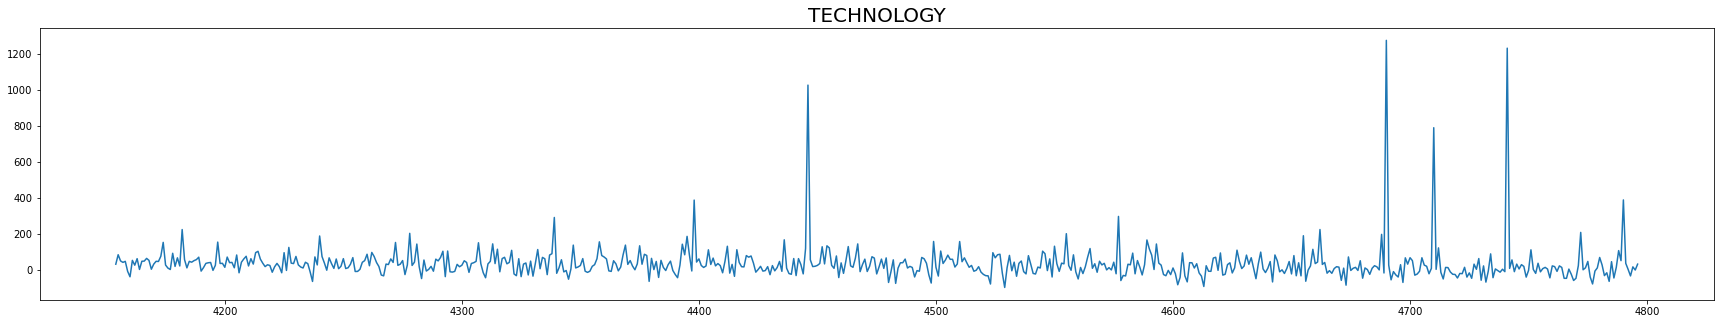

In [24]:
# Extract the columns we need in this step from the dataframe
df2016_ = data2016.loc[:, ['Sector', '2017 PRICE VAR [%]']]

# Get list of sectors
sector_list = df2016_['Sector'].unique()

# Plot the percent price variation for each sector
for sector in sector_list:
    
    temp = df2016_[df2016_['Sector'] == sector]

    plt.figure(figsize=(30,5))
    plt.plot(temp['2017 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

Thanks to this check, we can clearly see that there are indeed some major peaks in the following sectors:

Consumer Defensive Basic Materials Healthcare Consumer Cyclical Industrials Real Estate Energy Financial Services Utilities Technology This means that, for one reason or another, some stocks experienced incredible gains. However, how can be sure that each of these gains is organic (i.e. due to trading activity)?

We can take a closer look at this situation by plotting the price trend for those stocks that increased their value by more than 500% during 2016. While it is possible for a stock to experience such gains, I'd still like to verify it with my eyes.

Here, we will use pandas_datareader to pull the Adjusted Close daily price, during 2017, of the required stocks. To further investigate these stocks, I think it is worth to plot the Volume too.

In [25]:
# Get stocks that increased more than 500%
from pandas_datareader import data

gain = 500
top_gainers = df2016_[df2016_['2017 PRICE VAR [%]'] >= gain]
top_gainers = top_gainers['2017 PRICE VAR [%]'].sort_values(ascending=False) 
print(f'{len(top_gainers)} STOCKS with more than {gain}% gain.')
print()

19 STOCKS with more than 500% gain.



In [26]:
indices = list(df2016_[df2016_['2017 PRICE VAR [%]'] >= 500].index)
excess_ret_tickers = list(data2016.loc[indices, :].iloc[:, 0])
excess_ret_tickers

['HLG',
 'HCC',
 'MRNS',
 'AKCA',
 'XOMA',
 'ALT',
 'AQB',
 'RMBL',
 'INVH',
 'JAG',
 'LBC',
 'LX',
 'RIOT',
 'CBH',
 'JPT',
 'LFIN',
 'LOV',
 'GRVY',
 'FTNW']

In [27]:
##I think the best we can do is delete them all

In [28]:
tickers = top_gainers.index.values.tolist()
data2016.drop(tickers, axis=0, inplace=True)

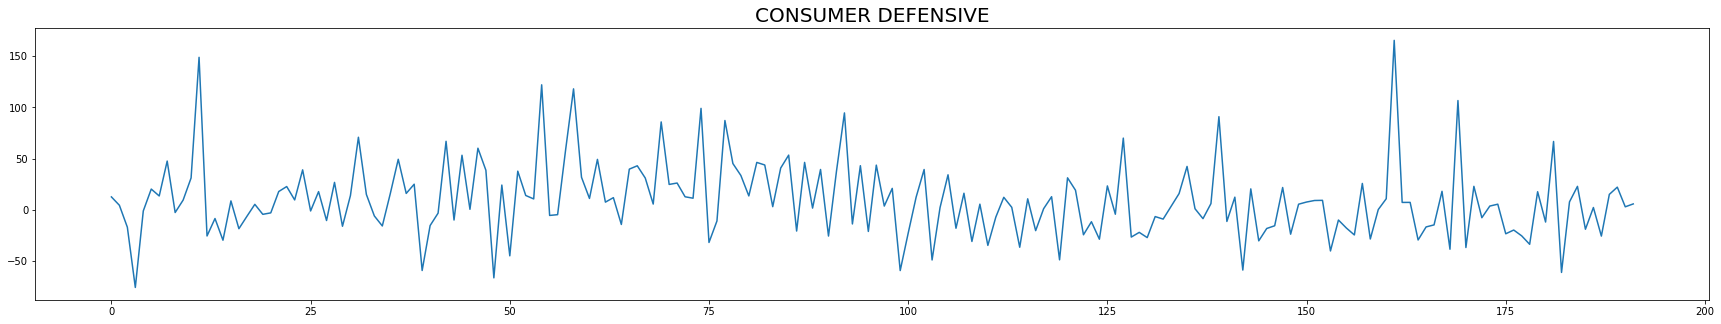

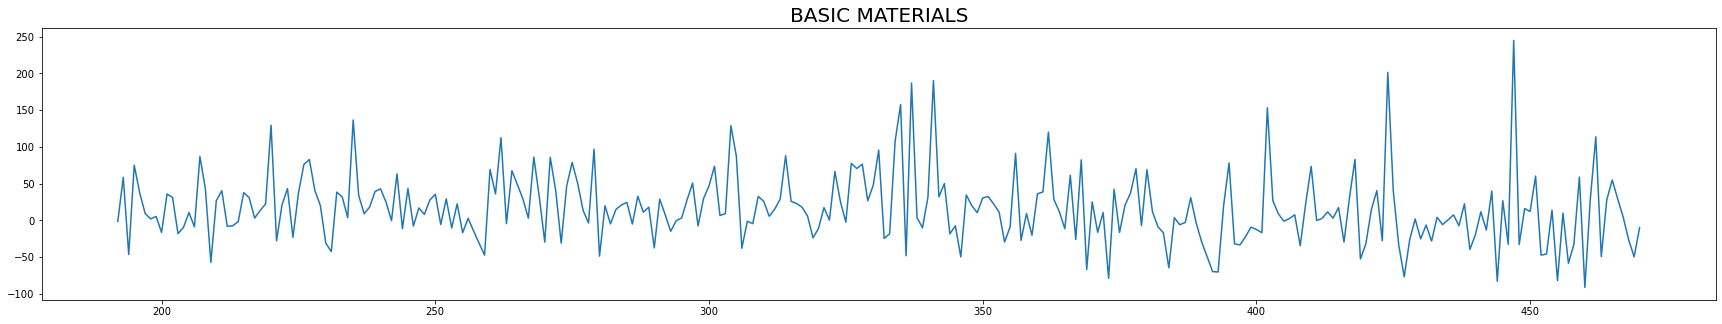

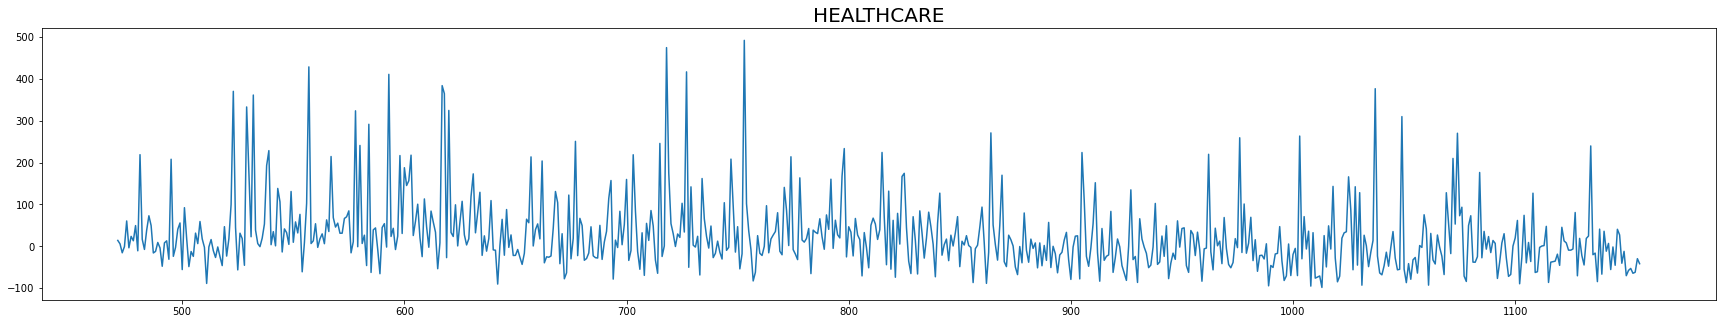

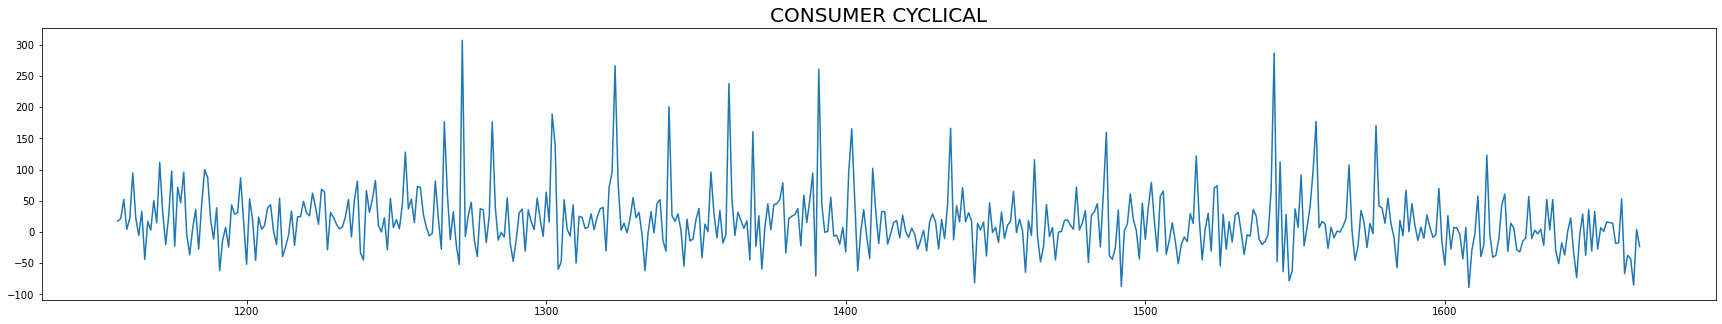

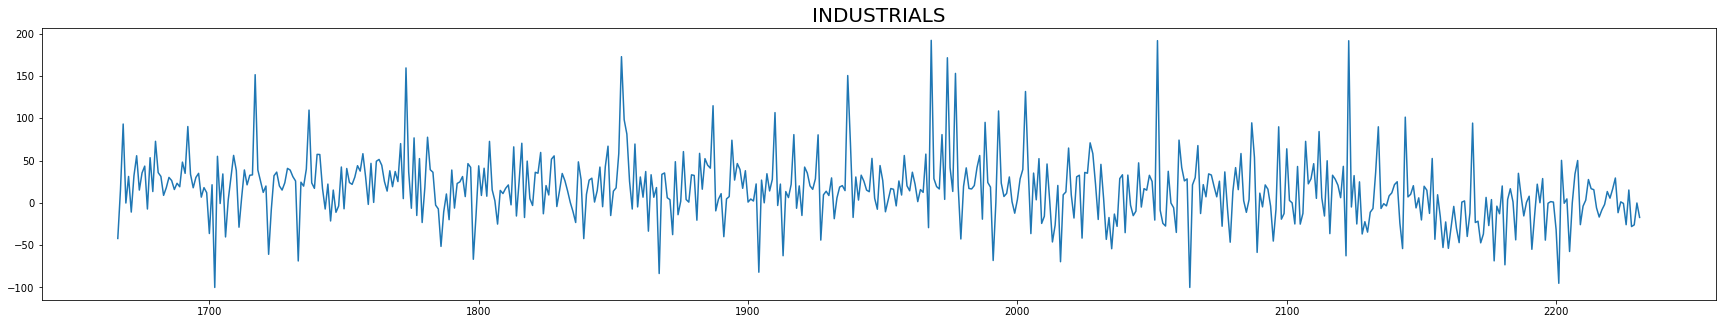

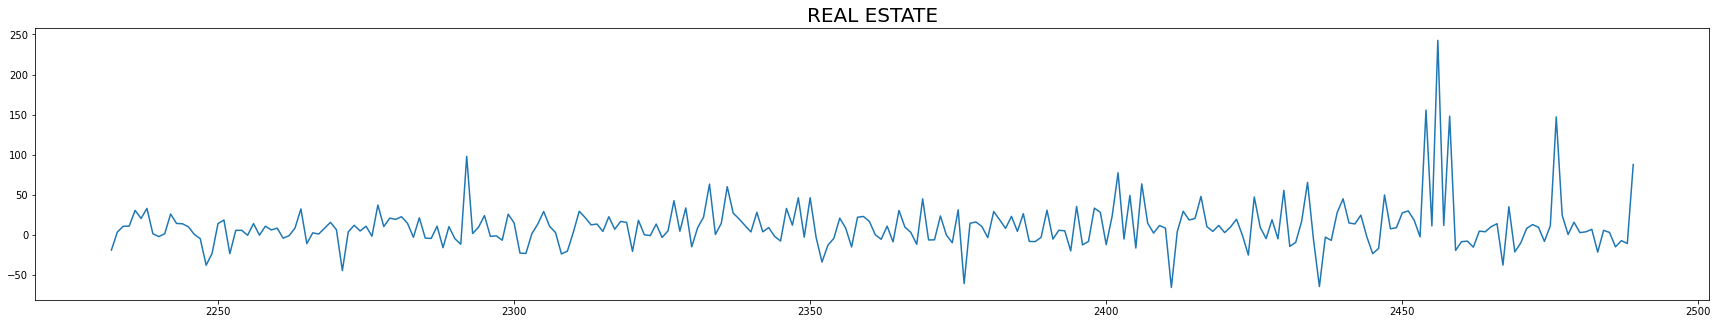

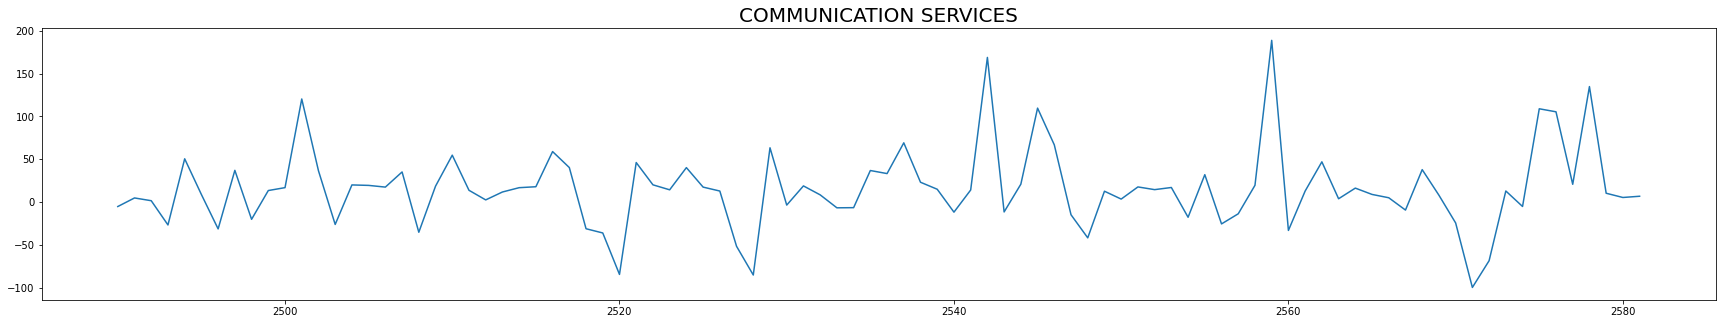

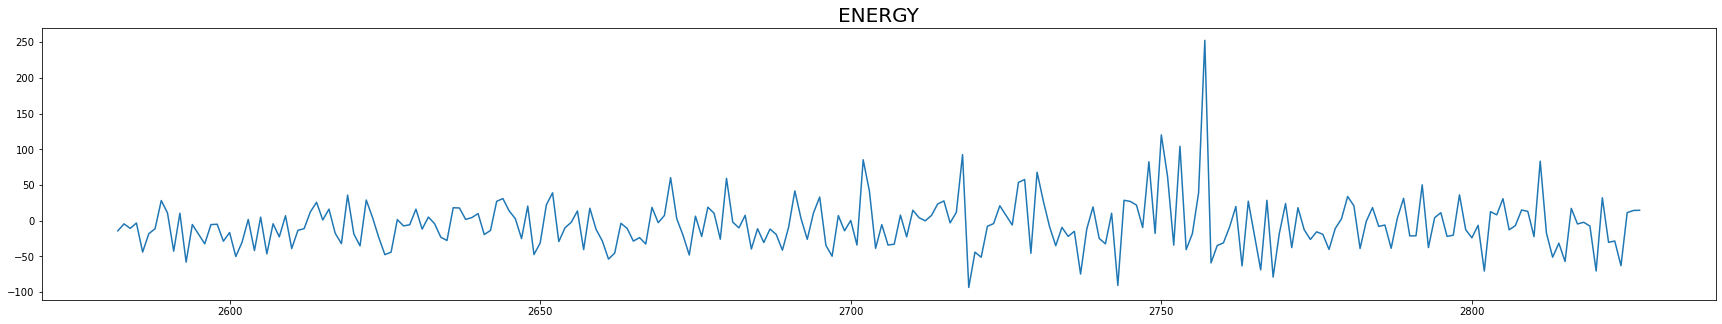

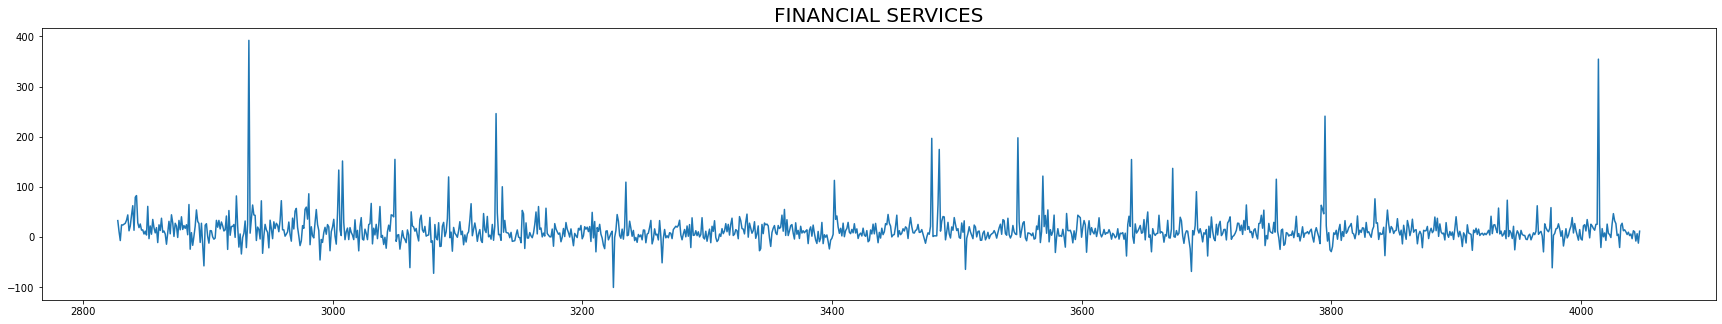

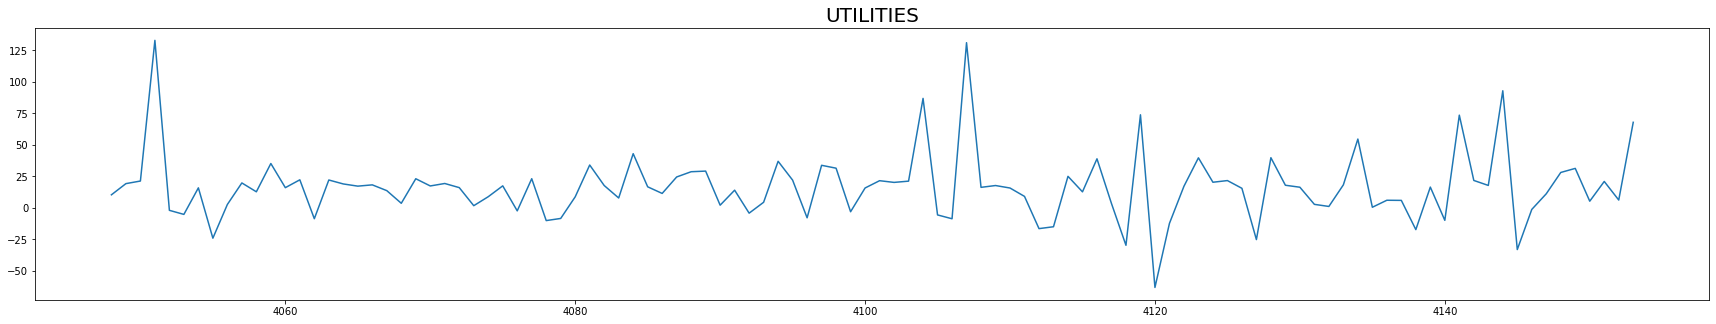

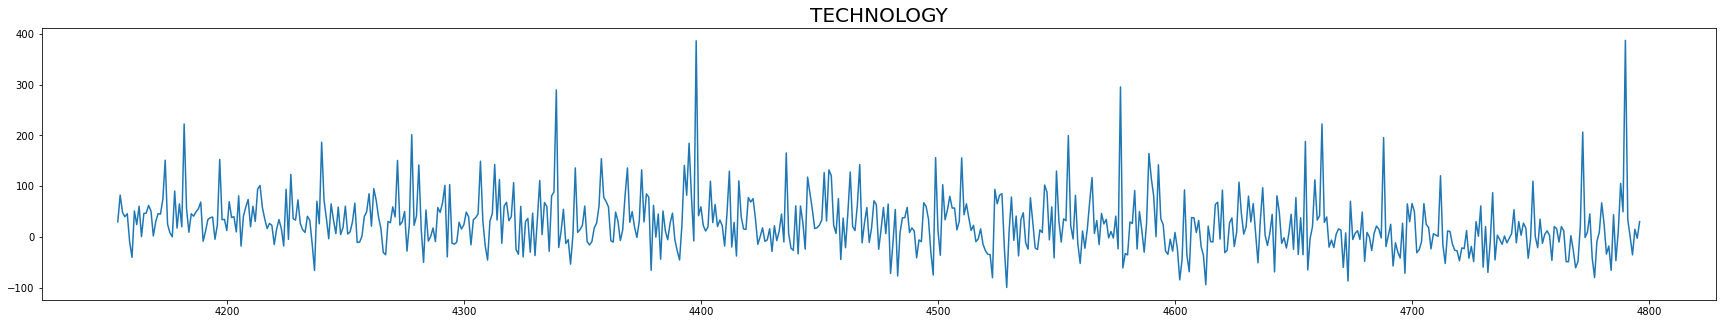

In [29]:
df2016_ = data2016.loc[:, ['Sector', '2017 PRICE VAR [%]']]
sector_list = df2016_['Sector'].unique()

for sector in sector_list:
    
    temp = df2016_[df2016_['Sector'] == sector] # get all data for one sector

    plt.figure(figsize=(30,5))
    plt.plot(temp['2017 PRICE VAR [%]'])
    plt.title(sector.upper(), fontsize=20)
    plt.show()

Now that's much better! We don't have any major peak, and the remaining ones are somewhat reasonable values.

Still, even if we removed all those fake top gainers, we cannot be fully certain that the remaining stocks have undergone an organic trading process during 2017.

### Eliminate missing values

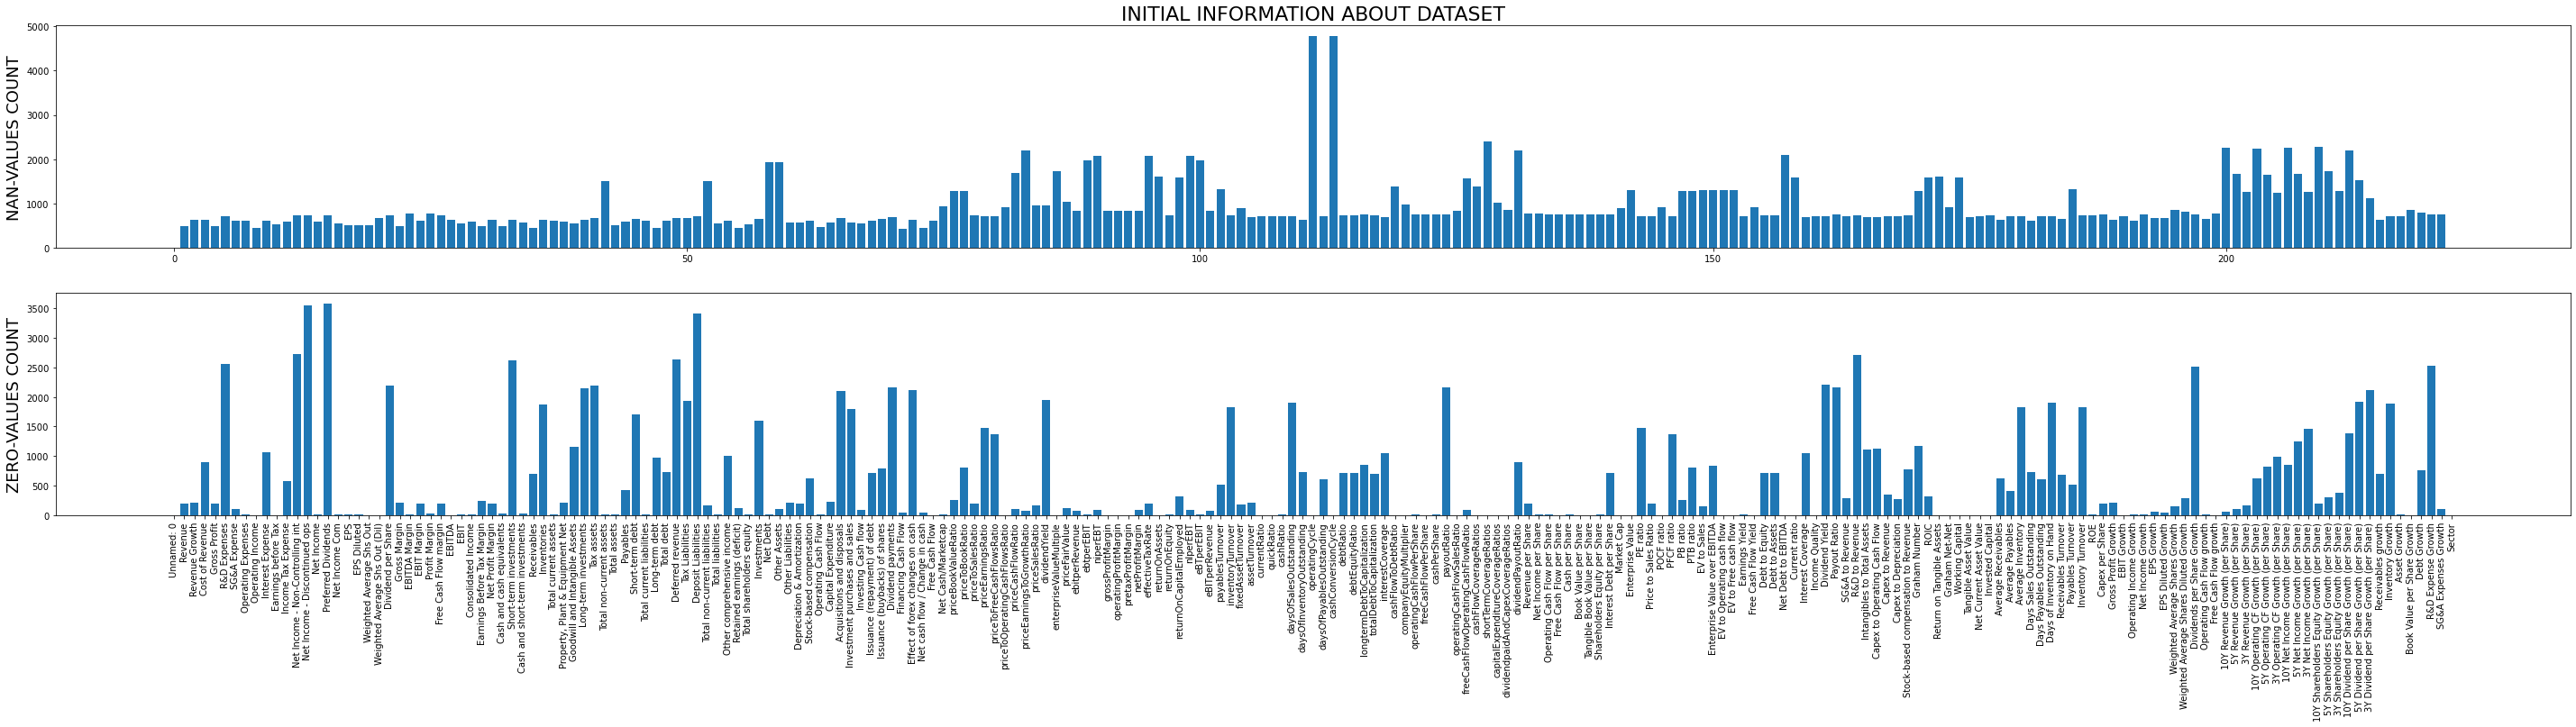

In [30]:
class_data = data2016.loc[:, ['Class', '2017 PRICE VAR [%]']]
data2016.drop(['Class', '2017 PRICE VAR [%]'], inplace=True, axis=1)

# Plot initial status of data quality in terms of nan-values and zero-values
nan_vals = data2016.isna().sum()
zero_vals = data2016.isin([0]).sum()
ind = np.arange(data2016.shape[1])

plt.figure(figsize=(50,10))

plt.subplot(2,1,1)
plt.title('INITIAL INFORMATION ABOUT DATASET', fontsize=22)
plt.bar(ind, nan_vals.values.tolist())
plt.ylabel('NAN-VALUES COUNT', fontsize=18)

plt.subplot(2,1,2)
plt.bar(ind, zero_vals.values.tolist())
plt.ylabel('ZERO-VALUES COUNT', fontsize=18)
plt.xticks(ind, nan_vals.index.values, rotation='90')

plt.show()

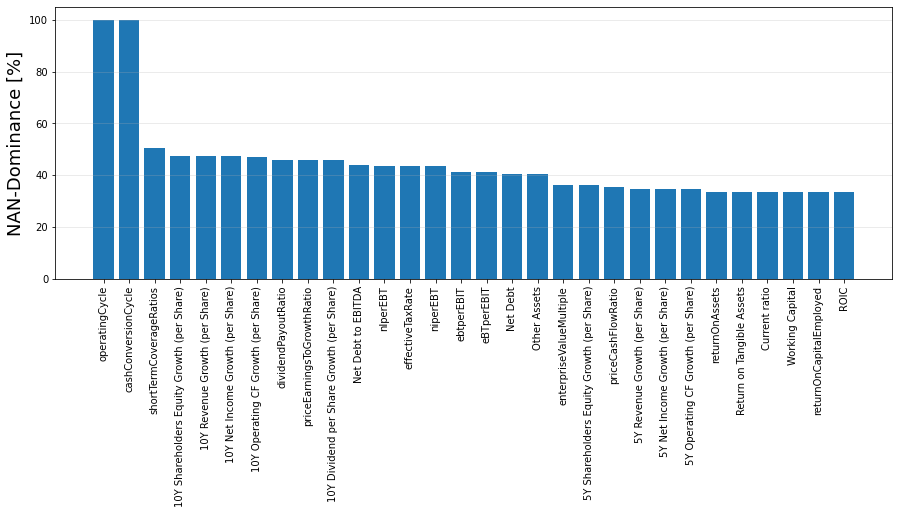

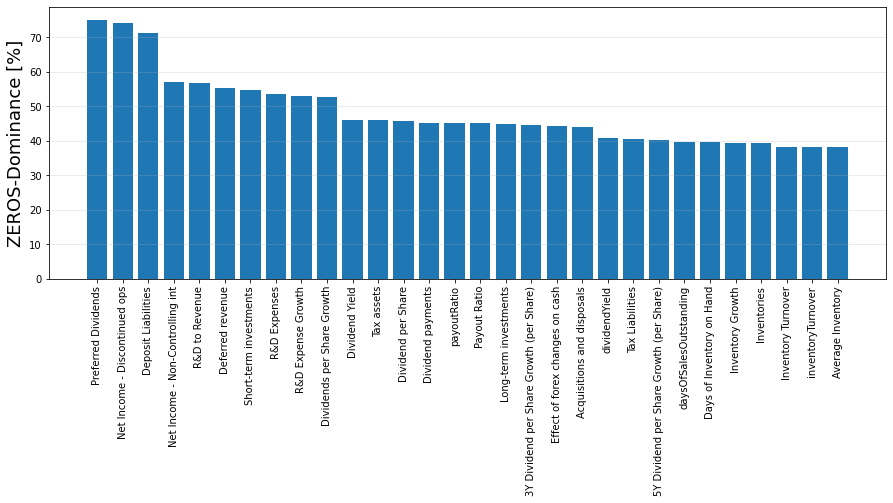

In [32]:
# Find count and percent of nan-values, zero-values
total_nans = data2016.isnull().sum().sort_values(ascending=False)
percent_nans = (data2016.isnull().sum()/data2016.isnull().count() * 100).sort_values(ascending=False)
total_zeros = data2016.isin([0]).sum().sort_values(ascending=False)
percent_zeros = (data2016.isin([0]).sum()/data2016.isin([0]).count() * 100).sort_values(ascending=False)
data2016_nans = pd.concat([total_nans, percent_nans], axis=1, keys=['Total NaN', 'Percent NaN'])
data2016_zeros = pd.concat([total_zeros, percent_zeros], axis=1, keys=['Total Zeros', 'Percent Zeros'])

# Graphical representation
plt.figure(figsize=(15,5))
plt.bar(np.arange(30), data2016_nans['Percent NaN'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), data2016_nans['Percent NaN'].iloc[:30].index.values.tolist(), rotation='90')
plt.ylabel('NAN-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

plt.figure(figsize=(15,5))
plt.bar(np.arange(30), data2016_zeros['Percent Zeros'].iloc[:30].values.tolist())
plt.xticks(np.arange(30), data2016_zeros['Percent Zeros'].iloc[:30].index.values.tolist(), rotation='90')
plt.ylabel('ZEROS-Dominance [%]', fontsize=18)
plt.grid(alpha=0.3, axis='y')
plt.show()

The two plots above clearly show that to improve the quality of the dataframe df we need to:

fill the missing data
fill or drop those indicators that are heavy zeros-dominant.
What levels of nan-dominance and zeros-dominance are we going to tolerate?

I usually determine a threshold level for both nan-dominance and zeros-dominance, which corresponds to a given percentage of the total available samples (rows): if a column has a percentage of nan-values and/or zero-valued entries higher than the threshold, I drop it.

For this specific case we know that we have about 3800 samples, so I reckon we can set:

nan-dominance threshold = 5-7%
zeros-dominance threshold = 5-10%
Once the threshold levels have been set, I iteratively compute the .quantile() of both df_nans and df_zeros in order to find the number of financial indicators that I will be dropping. In this case, we can see that:

We need to drop the top 50% (test_nan_level=1-0.5=0.5) nan-dominant financial indicators in order to not have columns with more than 226 nan values, which corresponds to a nan-dominance threshold of 5.9% (aligned with our initial guess).
We need to drop the top 40% (test_zeros_level=1-0.4=0.6) zero-dominant financial indicators in order to not have columns with more than 283 0 values, which corresponds to a zero-dominance threshold of 7.5% (aligned with our initial guess).

In [33]:
# Find reasonable threshold for nan-values situation
test_nan_level = 0.5
print(data2016_nans.quantile(test_nan_level))
_, thresh_nan = data2016_nans.quantile(test_nan_level)

# Find reasonable threshold for zero-values situation
test_zeros_level = 0.6
print(data2016_zeros.quantile(test_zeros_level))
_, thresh_zeros = data2016_zeros.quantile(test_zeros_level)

Total NaN     736.000
Percent NaN    15.404
Name: 0.5, dtype: float64
Total Zeros     294.400
Percent Zeros     6.162
Name: 0.6, dtype: float64


In [34]:
# Clean dataset applying thresholds for both zero values, nan-values
print(f'INITIAL NUMBER OF VARIABLES: {data2016.shape[1]}')
print()

data2016_test1 = data2016.drop((data2016_nans[data2016_nans['Percent NaN'] > thresh_nan]).index, 1)
print(f'NUMBER OF VARIABLES AFTER NaN THRESHOLD {thresh_nan:.2f}%: {data2016_test1.shape[1]}')
print()

data2016_zeros_postnan = data2016_zeros.drop((data2016_nans[data2016_nans['Percent NaN'] > thresh_nan]).index, axis=0)
data2016_test2 = data2016_test1.drop((data2016_zeros_postnan[data2016_zeros_postnan['Percent Zeros'] > thresh_zeros]).index, 1)
print(f'NUMBER OF VARIABLES AFTER Zeros THRESHOLD {thresh_zeros:.2f}%: {data2016_test2.shape[1]}')

INITIAL NUMBER OF VARIABLES: 223

NUMBER OF VARIABLES AFTER NaN THRESHOLD 15.40%: 117

NUMBER OF VARIABLES AFTER Zeros THRESHOLD 6.16%: 59


C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """
C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # Remove the CWD from sys.path while we load stuff.


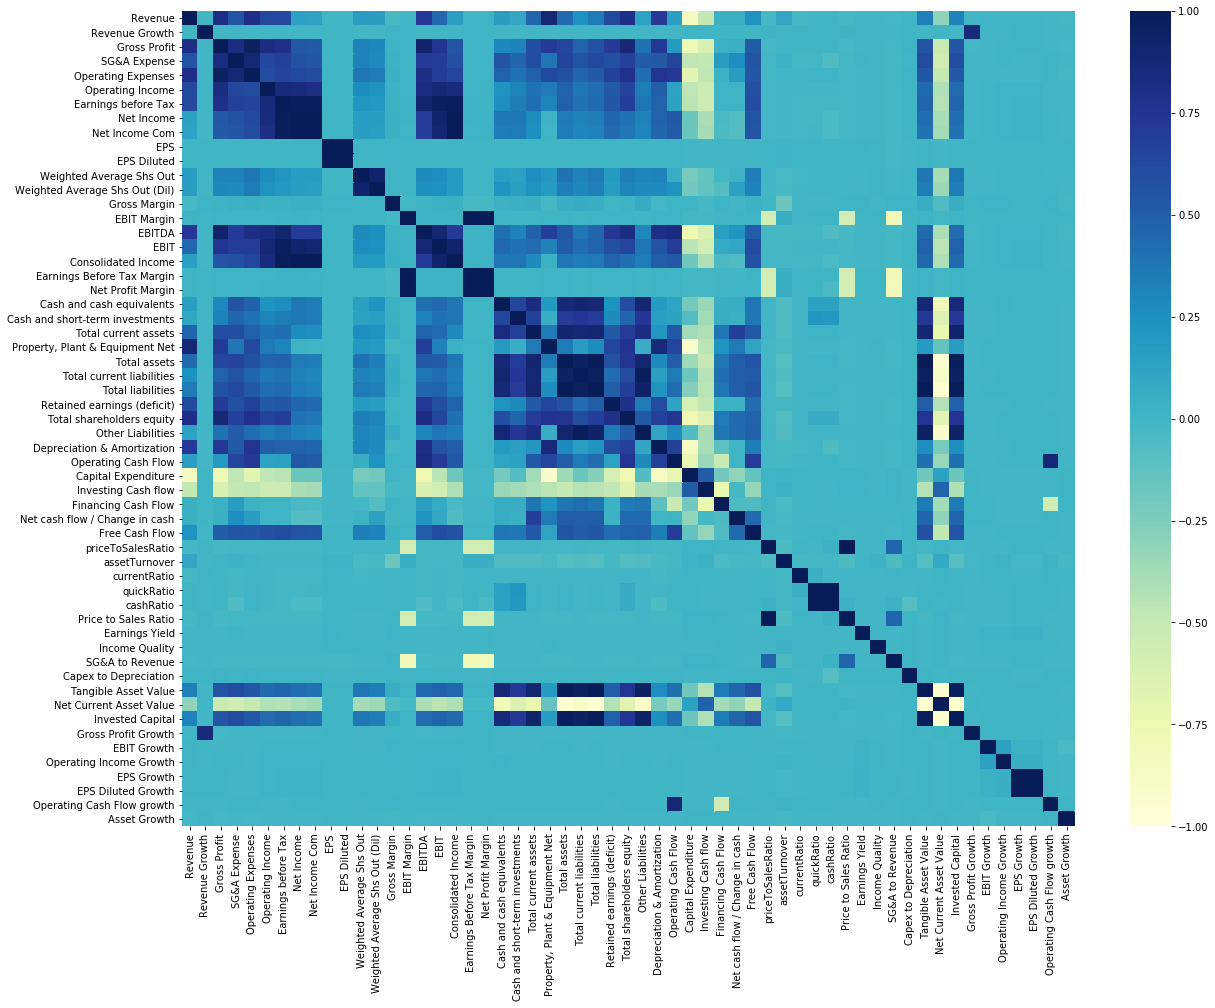

In [41]:
# Plot correlation matrix
fig, ax = plt.subplots(figsize=(20,15)) 
sns.heatmap(data2016_test2.corr(), annot=False, cmap='YlGnBu', vmin=-1, vmax=1, center=0, ax=ax)
plt.show()

## HANDLE EXTREME VALUES

In [35]:
data2016_test2.describe()

,Revenue,Revenue Growth,Gross Profit,SG&A Expense,Operating Expenses,Operating Income,Earnings before Tax,Net Income,Net Income Com,EPS,...,Tangible Asset Value,Net Current Asset Value,Invested Capital,Gross Profit Growth,EBIT Growth,Operating Income Growth,EPS Growth,EPS Diluted Growth,Operating Cash Flow growth,Asset Growth
count,4292.000,4132.000,4289.000,4168.000,4161.000,4316.000,4250.000,4176.000,4223.000,4259.000,...,4073.000,4062.000,4042.000,4147.000,4062.000,4152.000,4110.000,4110.000,4129.000,4059.000
mean,4819942918.108,1.526,1830880156.293,833975462.829,1291882034.352,525863901.588,432676864.728,310761440.900,313978644.248,-5522.091,...,15622905932.052,-8342344881.211,16992144678.641,4.624,0.354,0.179,-0.234,-0.236,198.139,0.531
std,32670078991.379,52.499,7927183507.986,3471747039.964,4939864441.320,2552958719.054,2193955666.950,1686585674.309,1711189352.183,255558.127,...,108599203701.168,60298704297.698,114589716259.052,151.096,15.477,12.561,34.481,34.456,9077.154,13.694
min,-381927000.000,-12.769,-3564189596.911,-52077922.078,-935700000.000,-6770000000.000,-7621000000.000,-21556000000.000,-21556000000.000,-13734375.000,...,-275680000.000,-1297150000000.000,-453122000.000,-95.100,-221.425,-252.622,-2125.000,-2125.000,-5831.500,-1.000
25%,52784000.000,-0.047,26910000.000,17282250.000,34531000.000,-5525500.000,-9826420.500,-11108500.000,-11444500.000,-0.455,...,151710000.000,-1624520000.000,91747995.500,-0.041,-0.314,-0.265,-0.296,-0.293,-0.279,-0.041
50%,408176000.000,0.032,179035000.000,76921153.846,151923000.000,30831500.000,20327239.000,14932000.000,14576000.000,0.550,...,839048000.000,-131709500.000,826394500.000,0.051,0.055,0.058,0.091,0.090,0.049,0.040
75%,2080651250.000,0.160,802000000.000,352676250.000,598428000.000,227000000.000,167255750.000,133100000.000,134620500.000,1.860,...,3750391000.000,21823500.000,4364331752.145,0.194,0.428,0.396,0.547,0.545,0.407,0.146
max,1822805000000.000,3234.457,274421000000.000,97041000000.000,97041000000.000,60024000000.000,61372000000.000,45687000000.000,45687000000.000,168401.000,...,2495056000000.000,76947000000.000,2542445000000.000,8210.442,663.563,598.638,372.500,364.500,425499.000,636.157


In [31]:
# Cut outliers
top_quantiles = data2016_test2.quantile(0.97)
outliers_top = (data2016_test2 > top_quantiles)

low_quantiles = data2016_test2.quantile(0.03)
outliers_low = (data2016_test2 < low_quantiles)

data2016_test2 = data2016_test2.mask(outliers_top, top_quantiles, axis=1)
data2016_test2 = data2016_test2.mask(outliers_low, low_quantiles, axis=1)

# Take a look at the dataframe post-outliers cut
data2016_test2.describe()

C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,10Y Dividend per Share Growth (per Share),5Y Dividend per Share Growth (per Share),3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth
count,4292.000,4132.000,4141.000,4289.000,4069.000,4168.000,4161.000,4316.000,4161.000,4250.000,...,2582.000,3246.000,3659.000,4141.000,4056.000,4059.000,3911.000,3987.000,4010.000,4025.000
mean,2998553547.742,0.097,1646729158.712,1226409432.123,32458065.287,540311925.278,862576301.075,360508722.644,64904229.112,284214454.453,...,-0.028,-0.002,-0.007,0.133,0.028,0.116,0.036,0.126,0.061,0.111
std,6550215225.206,0.358,3738130999.814,2861884938.540,92922955.396,1240641983.977,1918661265.772,923617682.979,144917374.036,770997426.130,...,0.224,0.208,0.224,0.487,0.200,0.359,0.473,0.647,0.223,0.268
min,0.000,-0.550,0.000,0.000,0.000,932614.850,3604296.400,-211415700.000,0.000,-344665110.565,...,-1.000,-1.000,-1.000,-0.653,-0.395,-0.388,-1.000,-0.983,-0.333,-0.307
25%,52784000.000,-0.047,2813680.000,26910000.000,0.000,17282250.000,34531000.000,-5525500.000,0.000,-9826420.500,...,0.000,0.000,0.000,-0.049,-0.000,-0.041,-0.123,-0.080,0.000,-0.028
50%,408176000.000,0.032,143260000.000,179035000.000,0.000,76921153.846,151923000.000,30831500.000,3310000.000,20327239.000,...,0.000,0.000,0.000,0.006,0.000,0.040,0.026,0.000,0.000,0.049
75%,2080651250.000,0.160,1113508000.000,802000000.000,12375000.000,352676250.000,598428000.000,227000000.000,47869000.000,167255750.000,...,0.028,0.037,0.041,0.198,0.030,0.146,0.122,0.124,0.000,0.178
max,30347000000.000,1.430,17153580000.000,14051872683.869,466994560.000,5957630000.000,9217852631.579,4424800000.000,666074000.000,3593000000.000,...,0.213,0.359,0.398,2.032,0.736,1.531,1.692,2.809,0.876,1.030


## FILL MISSING VALUES

In [32]:
# Replace nan-values with mean value of column, considering each sector individually.
data2016_test2 = data2016_test2.groupby(['Sector']).transform(lambda x: x.fillna(x.mean()))

C:\Users\carlo\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Dropping invalid columns in DataFrameGroupBy.transform is deprecated. In a future version, a TypeError will be raised. Before calling .transform, select only columns which should be valid for the transforming function.
  


In [33]:
# Add the sector column
data2016_out = data2016_test2.join(data2016['Sector'])

# Add back the classification columns
data2016_out = data2016_out.join(class_data)

# Print information about dataset
data2016_out.info()
data2016_out.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4778 entries, 0 to 4796
Columns: 224 entries, Revenue to 2017 PRICE VAR [%]
dtypes: float64(222), int64(1), object(1)
memory usage: 8.3+ MB


,Revenue,Revenue Growth,Cost of Revenue,Gross Profit,R&D Expenses,SG&A Expense,Operating Expenses,Operating Income,Interest Expense,Earnings before Tax,...,3Y Dividend per Share Growth (per Share),Receivables growth,Inventory Growth,Asset Growth,Book Value per Share Growth,Debt Growth,R&D Expense Growth,SG&A Expenses Growth,Class,2017 PRICE VAR [%]
count,4778.000,4778.000,4778.000,4778.000,4778.000,4778.000,4778.000,4778.000,4778.000,4778.000,...,4778.000,4778.000,4778.000,4778.000,4778.000,4778.000,4778.000,4778.000,4778.000,4778.000
mean,2946838391.817,0.097,1542155319.298,1244327184.174,28540851.635,566141120.100,887521844.533,366693932.484,61425226.526,290570104.402,...,-0.002,0.127,0.026,0.115,0.041,0.127,0.053,0.108,0.670,16.877
std,6212960282.261,0.334,3494891879.101,2713883784.718,86381095.884,1161684848.727,1793653816.774,878359184.428,135991337.860,727897329.263,...,0.197,0.454,0.184,0.331,0.428,0.591,0.205,0.246,0.470,50.997
min,0.000,-0.550,0.000,0.000,0.000,932614.850,3604296.400,-211415700.000,0.000,-344665110.565,...,-1.000,-0.653,-0.395,-0.388,-1.000,-0.983,-0.333,-0.307,0.000,-99.999
25%,69581000.500,-0.029,9555500.000,34706500.000,0.000,21819750.000,43962250.000,-2641595.250,2019.211,-6012000.000,...,0.000,-0.021,0.000,-0.023,-0.068,-0.047,0.000,-0.010,0.000,-6.897
50%,581723500.000,0.057,277424500.000,256632500.000,0.000,116372000.000,215569000.000,51272000.000,8426897.000,37910000.000,...,0.000,0.047,0.000,0.066,0.046,0.004,0.000,0.078,1.000,10.788
75%,2392121764.326,0.138,908550250.000,1437110558.833,9659250.000,766966313.517,1088356703.833,402184750.000,40787500.000,339852750.000,...,0.043,0.165,0.015,0.129,0.098,0.131,0.003,0.147,1.000,31.172
max,30347000000.000,1.430,17153580000.000,14051872683.869,466994560.000,5957630000.000,9217852631.579,4424800000.000,666074000.000,3593000000.000,...,0.398,2.032,0.736,1.531,1.692,2.809,0.876,1.030,1.000,492.471
